## Support Vector Regressor Implementation

In [1]:
# Importing required libaray
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[-1.53821266,  0.01663876],
       [ 0.0384842 ,  1.18613783],
       [ 0.06160072, -0.24971296],
       ...,
       [ 2.4128266 , -1.65979373],
       [ 0.67431085,  0.00368772],
       [-1.02095511, -0.67164401]])

In [5]:
y

array([-1.38258050e+02,  9.87346984e+01, -1.38482328e+01, -2.14334786e+02,
       -2.34302436e+01, -3.87996005e+01, -1.70601386e+02, -1.08738055e+01,
        1.42108307e+02,  1.38007610e+02,  1.41212931e+02, -1.08002723e+02,
       -1.91443430e+02, -2.62129141e+02,  5.36424235e+01, -7.29890933e+01,
        8.37691737e+01, -1.65675290e+02,  2.52704417e+02, -5.14944509e+01,
       -4.76896783e+01,  1.50510702e+02, -2.23830547e+01, -6.84153065e+01,
       -1.03785981e+02,  1.00721702e+02, -1.14819468e+01, -1.81185654e+01,
        4.17193678e+01, -7.36028484e-01,  2.95116136e+01, -1.33738454e+02,
        3.11451254e+01,  2.23251583e+02, -9.71626616e+01,  5.46633942e+01,
       -7.71256700e+00, -4.62157587e+01, -9.98328188e+00,  5.21224195e+01,
       -1.77377757e+01,  1.87969368e+01, -2.51483471e+02,  9.87001965e+01,
        1.74295527e+02,  4.42909010e+01, -3.74607960e+01,  9.55624038e+01,
        7.79665530e+01,  1.61700047e+02, -1.40064844e+02,  3.96904953e+01,
        8.13521417e+01, -

In [6]:
pd.DataFrame(X)[0]

0     -1.538213
1      0.038484
2      0.061601
3     -1.513091
4     -0.255888
         ...   
995    0.675059
996   -0.114349
997    2.412827
998    0.674311
999   -1.020955
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

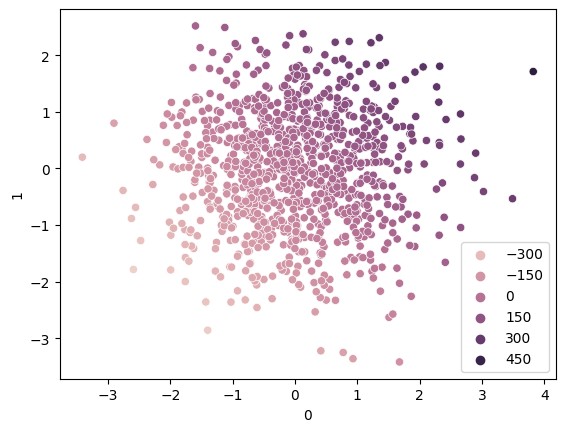

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr=SVR(kernel='linear')

In [11]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[90.76608635, 82.51503198]])

In [13]:
## Prediction
y_pred=svr.predict(X_test)

In [14]:
y_pred

array([-230.46204442,   14.63879097,  -60.6697308 ,   46.01013425,
        -72.7968982 ,   89.34046593,  -60.58762866,  154.85063977,
       -108.91623652,   -9.62457325,  154.47845874,  -76.00663924,
        122.96026454,   38.46471553, -171.93219184,  -51.6805055 ,
        175.84784589, -136.45088863,  197.67367395,  117.02948684,
        237.07751576,  -79.58204018,   59.2078067 ,   39.37282997,
        194.608767  ,   83.66718798,   18.65377133,    2.02198801,
       -138.38295673,  -61.95888098,  106.11817781,  125.35404041,
        -67.85610338, -150.96523697,  -21.96501868,  -27.12445164,
        173.89947267,  -40.73584454,  -33.80402179,   89.80157478,
         15.42093982, -193.01548449,  -98.45146965,  -17.43418541,
          6.18720209,   44.68526199, -229.01553729,   30.3030569 ,
         43.18282176,  -54.6439058 ,  -13.962949  , -278.10413962,
        -99.59942741,  240.76575594,  -57.28931335,   86.24164531,
        291.29049711,  -80.91500072,  111.50853823,  -20.83297

In [15]:
from sklearn.metrics import r2_score

In [16]:
print(r2_score(y_test,y_pred))

0.9993611743336387


## Hyperparametere Tuning With SVR

In [17]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [18]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [19]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.635 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.631 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.622 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.621 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.617 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.635 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.631 total time=   0.0s


[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.622 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.621 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.617 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.01, kernel=linear;, score=0.635 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.01, kernel=linear;, score=0.631 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.01, kernel=linear;, score=0.622 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.01, kernel=linear;, score=0.621 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.01, kernel=linear;, score=0.617 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.635 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.631 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.622 total t

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 10, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [21]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9993896157868992
